In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
import sklearn.metrics as metric


In [2]:
get_ipython().run_line_magic('matplotlib', 'inline')


In [33]:
filedata='DATA2.csv'


In [34]:
data1=pd.read_csv(filedata)
data1

,X1,X2,Y
0,1,1,-1
1,2,1,-1
2,1,-1,-1
3,2,-1,-1
4,4,0,1
5,5,1,1
6,5,-1,1
7,6,0,1


In [35]:
X1=data1['X1']
X2=data1['X2']


In [36]:
X_training=np.array(list(zip(X1,X2)))
X_training

array([[ 1,  1],
       [ 2,  1],
       [ 1, -1],
       [ 2, -1],
       [ 4,  0],
       [ 5,  1],
       [ 5, -1],
       [ 6,  0]])

In [37]:
y_training=data1['Y']
y_training

0   -1
1   -1
2   -1
3   -1
4    1
5    1
6    1
7    1
Name: Y, dtype: int64

In [38]:
target_names=['-1','+1']


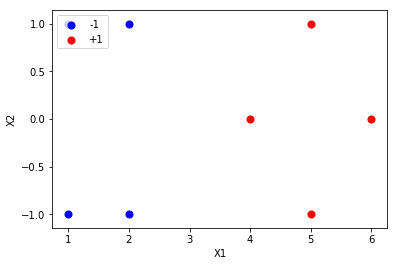

In [39]:
idxPlus=y_training[y_training<0].index
idxMin=y_training[y_training>0].index
plt.scatter(X_training[idxPlus,0],X_training[idxPlus,1],c='b',s=50)
plt.scatter(X_training[idxMin,0],X_training[idxMin,1],c='r',s=50)
plt.legend(target_names,loc=2)
plt.xlabel('X1')
plt.ylabel('X2');
plt.savefig('chart0.png')

In [40]:
svc = svm.SVC(kernel='linear').fit(X_training,y_training)
svc

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [41]:
svc.get_params(True)


{'C': 1.0,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto_deprecated',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [42]:
import math


In [43]:

lbX1=math.floor(min(X_training[:,0]))-1
ubX1=math.ceil(max(X_training[:,0]))+1
lbX2=math.floor(min(X_training[:,1]))-1
ubX2=math.ceil(max(X_training[:,1]))+1
[lbX1,ubX1,lbX2,ubX2]

[0, 7, -2, 2]

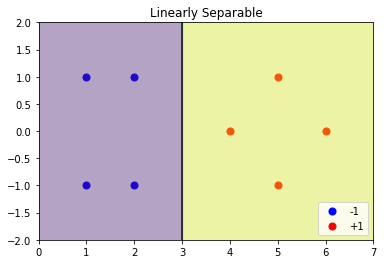

In [44]:
idxPlus=y_training[y_training<0].index
idxMin=y_training[y_training>0].index
plt.scatter(X_training[idxPlus,0],X_training[idxPlus,1],c='b',s=50)
plt.scatter(X_training[idxMin,0],X_training[idxMin,1],c='r',s=50)
plt.legend(target_names,loc=4)

X,Y = np.mgrid[lbX1:ubX1:100j,lbX2:ubX2:100j]
Z = svc.decision_function(np.c_[X.ravel(),Y.ravel()])

Z = Z.reshape(X.shape)
plt.contourf(X,Y,Z > 0,alpha=0.4)
plt.contour(X,Y,Z,colors=['k'], linestyles=['-'],levels=[0])

plt.title('Linearly Separable')
plt.savefig('chart1.png')


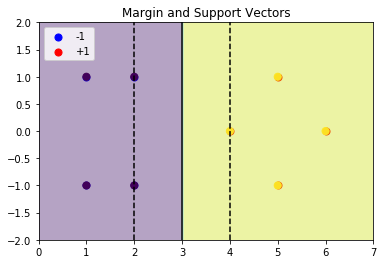

In [45]:
idxPlus=y_training[y_training<0].index
idxMin=y_training[y_training>0].index
plt.scatter(X_training[idxPlus,0],X_training[idxPlus,1],c='b',s=50)
plt.scatter(X_training[idxMin,0],X_training[idxMin,1],c='r',s=50)
plt.legend(target_names,loc=2)
X,Y = np.mgrid[lbX1:ubX1:100j,lbX2:ubX2:100j]
Z = svc.decision_function(np.c_[X.ravel(),Y.ravel()])
Z = Z.reshape(X.shape)

plt.contourf(X,Y,Z > 0,alpha=0.4)
plt.contour(X,Y,Z,colors=['k','k','k'], linestyles=['--','-','--'],levels=[-1,0,1])
plt.scatter(svc.support_vectors_[:,0],svc.support_vectors_[:,1],s=120,facecolors='none')
plt.scatter(X_training[:,0],X_training[:,1],c=y_training,s=50,alpha=0.95);

plt.title('Margin and Support Vectors')
plt.savefig('chart2.png')

In [46]:
svc.n_support_

array([2, 1], dtype=int32)

In [47]:
svc.support_ 


array([1, 3, 4], dtype=int32)

In [48]:
svc.support_vectors_
#svc.coef_

array([[ 9.99680000e-01, -5.55111512e-17]])

In [50]:
weight

array([[ 9.99680000e-01, -5.55111512e-17]])

In [49]:
weight=svc.coef_
intercept=svc.intercept_
a = -weight[0,0] / weight[0,1]
print('x2=',a,' * x1 + ',-intercept[0]/weight[0,1])

x2= 1.800863390195895e+16  * x1 +  -5.4027823241717864e+16


In [51]:
svc.score(X_training, y_training)

1.0

In [52]:

y_pred=svc.predict(X_training)
y_pred

array([-1, -1, -1, -1,  1,  1,  1,  1])

In [53]:
y_true = y_training
y_true

0   -1
1   -1
2   -1
3   -1
4    1
5    1
6    1
7    1
Name: Y, dtype: int64

In [54]:
metric.accuracy_score(y_true, y_pred, normalize=False)


8

In [55]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))

[[4 0]
 [0 4]]
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         4

   micro avg       1.00      1.00      1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



In [56]:

svc.predict([[4,2]])

array([1])

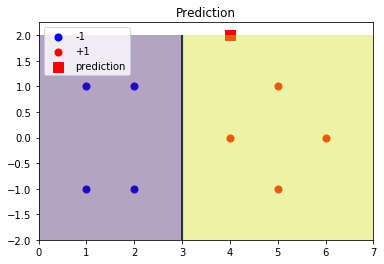

In [29]:
idxPlus=y_training[y_training<0].index
idxMin=y_training[y_training>0].index
plt.scatter(X_training[idxPlus,0],X_training[idxPlus,1],c='b',s=50)
plt.scatter(X_training[idxMin,0],X_training[idxMin,1],c='r',s=50)
plt.scatter(4,2,c='r',marker='s',s=90)
plt.legend(['-1','+1','prediction'],loc=2)

X,Y = np.mgrid[lbX1:ubX1:100j,lbX2:ubX2:100j]
Z = svc.decision_function(np.c_[X.ravel(),Y.ravel()])
Z = Z.reshape(X.shape)
plt.contourf(X,Y,Z > 0,alpha=0.4)
plt.contour(X,Y,Z,colors=['k'], linestyles=['-'],levels=[0])

plt.title('Prediction')
plt.savefig('chart3.png')
